In [4]:
from schrutepy import schrutepy
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [52]:
df = schrutepy.load_schrute()

In [53]:
df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [54]:
#Check if we have texts with null values, indeed we have
null_text = pd.isnull(df["text"])
df[null_text]


,index,season,episode,episode_name,director,writer,character,text,text_w_direction
149,150,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Pam,NaN,[Laughing]
345,346,1,2,Diversity Day,Ken Kwapis,B.J. Novak,Jim,NaN,[/b]
1282,1283,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Kevin,NaN,[nods]
1346,1347,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Toby,NaN,[looks resigned]
1394,1395,1,6,Hot Girl,Amy Heckerling,Mindy Kaling,Pam,NaN,[smiles]
...,...,...,...,...,...,...,...,...,...
54783,54784,9,24,Finale,Ken Kwapis,Greg Daniels,Bill Hader,NaN,[pulling multiple tissues out]
54937,54938,9,24,Finale,Ken Kwapis,Greg Daniels,Toby,NaN,[dancing with Pam] [sobbing]
54946,54947,9,24,Finale,Ken Kwapis,Greg Daniels,Guy,NaN,[fake cries]
54978,54979,9,24,Finale,Ken Kwapis,Greg Daniels,Rachel,NaN,[speaks in a special language]


In [55]:
#Cleaning
df=df.dropna(subset=['text'])
null_text = pd.isnull(df["text"])
df[null_text]


,index,season,episode,episode_name,director,writer,character,text,text_w_direction


<h1>Questions</h1>
<ul>
    <li> Qual personagem teve mais falas no total ? </li>
    <li> Variação da quantidade de falas por temporada pra cada personagem</li>
    <li> Com quem cada personagem mais interagiu ? </li>
    <li> Qual diretor mais dirigiu episódios? </li>
    <li> Qual a média ratings de cada diretor ? </li>
</ul>


<h3>Qual personagem teve mais falas?</h3>

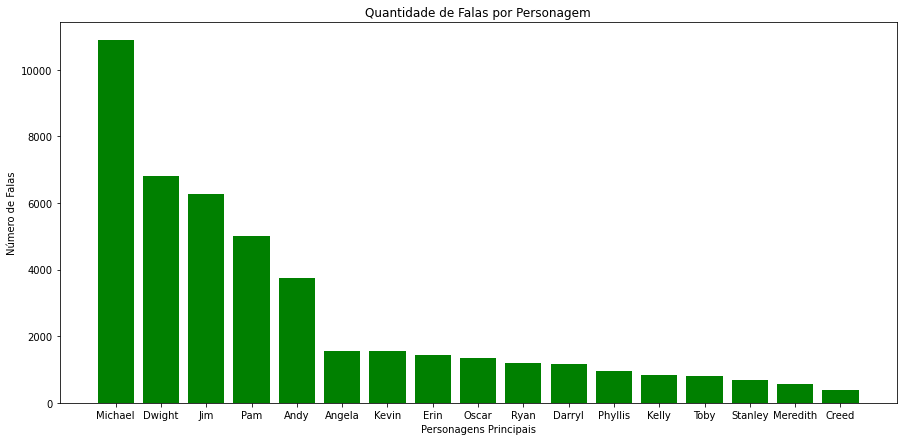

In [75]:
#DATAVIZ here
valores = []
personagens = []
main_cast=["Ryan","Meredith","Creed","Darryl","Andy","Michael","Dwight","Jim","Pam","Angela","Stanley","Erin","Toby","Phyllis","Kelly","Kevin","Oscar"]

for index, value in df["character"].value_counts().items():
    if index in main_cast:
        personagens.append(index)
        valores.append(value)
        
plt.figure(figsize=(15,7))        
plt.bar(personagens, valores,color='green')
plt.xlabel("Personagens Principais")
plt.ylabel("Número de Falas")
plt.title("Quantidade de Falas por Personagem")

plt.show()

<h3>Variação da quantidade de falas por temporada pra cada personagem</h3>

<Figure size 432x288 with 0 Axes>

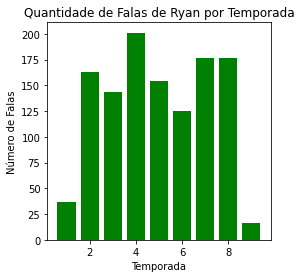

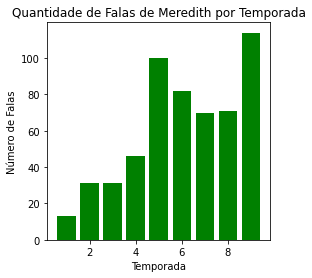

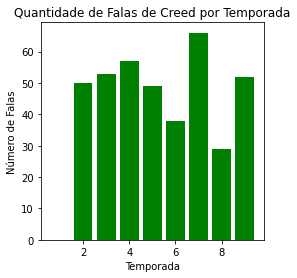

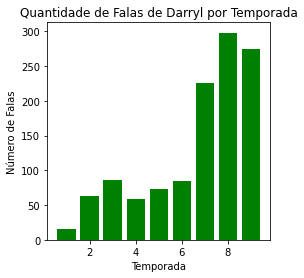

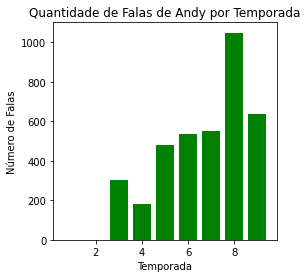

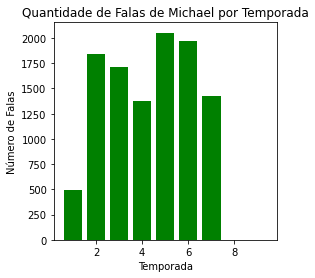

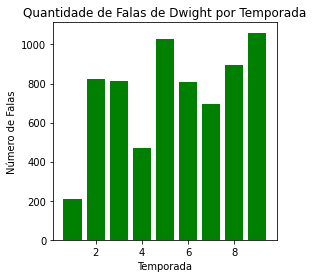

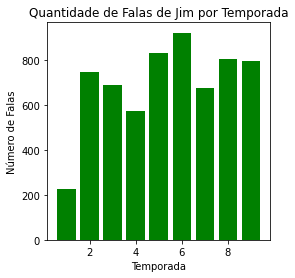

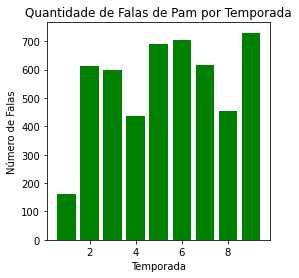

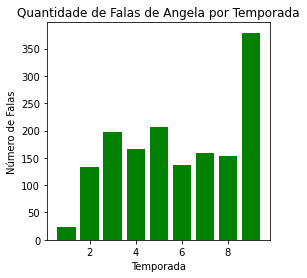

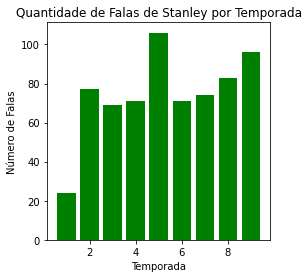

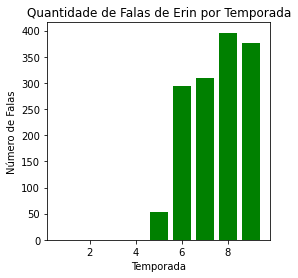

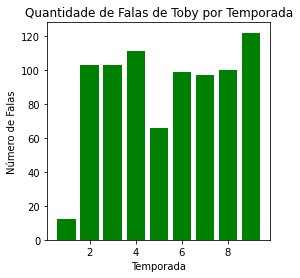

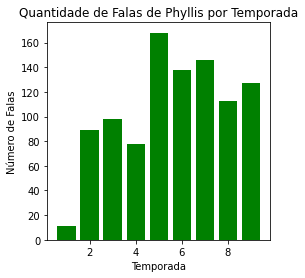

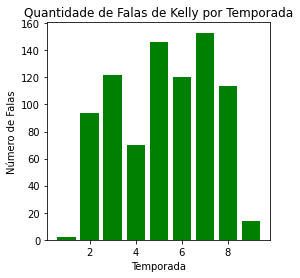

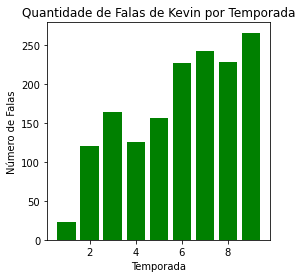

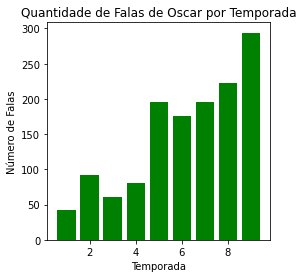

In [86]:
#Quais personagens teve mais falas em cada temporada: boring! Michael speaks the most!

for personagem in main_cast:
    falas_personagem = df[df["character"]==personagem]
    temporadas=[]
    falas=[]
    for i in range(1,10):
        temporada_df = falas_personagem[falas_personagem["season"]==i]
        temporadas.append(i)
        falas.append(len(temporada_df.index))
    plt.figure(i)
    plt.figure(figsize=(4,4))        
    plt.bar(temporadas, falas ,color='green')
    plt.xlabel("Temporada")
    plt.ylabel("Número de Falas")
    plt.title("Quantidade de Falas de "+personagem+" por Temporada")
plt.show()

<h3>Qual diretor dirigiu mais episódios ? </h3>

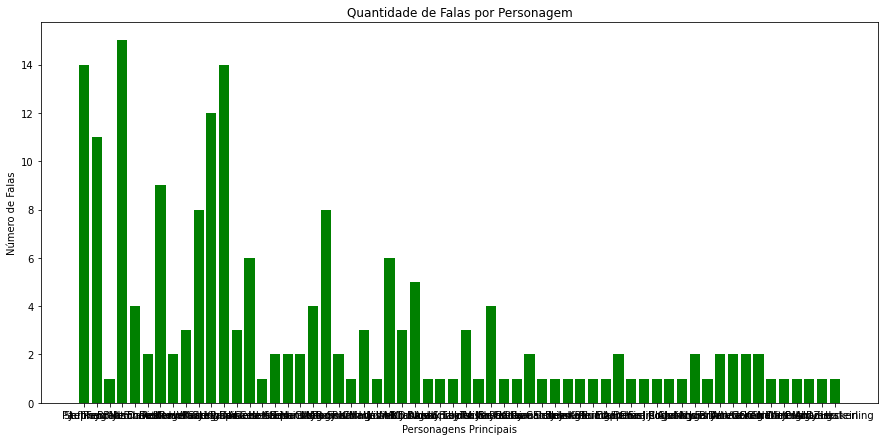

In [153]:
directors_list=list()
num_episodes = 0
for temporada,_ in df["season"].value_counts().items():

    temporada_df = df[df["season"]==temporada]
    for episode,_ in temporada_df["episode"].value_counts().items():
        
        episodio_df = temporada_df[temporada_df["episode"]==episode]
        linha = episodio_df.iloc[[0]]
        director = linha["director"].values[0]
        if ';' in director:
            mais_de_um_diretor = director.split(";")
            for i in range(len(mais_de_um_diretor)):
                directors_list.append(mais_de_um_diretor[i].strip())
        else:       
            directors_list.append(director)
        
new_director = list()    
ocorrencias = list()
for director in directors_list:
    ocorrencias.append(directors_list.count(director))
    new_director.append(director)
    directors_list = list(filter((director).__ne__, directors_list))

        
plt.figure(figsize=(15,7))        
plt.bar(new_director, ocorrencias,color='green')
plt.xlabel("Personagens Principais")
plt.ylabel("Número de Falas")
plt.title("Quantidade de Falas por Personagem")

plt.show()    
        
        
  

